<a target="_blank" href="https://colab.research.google.com/github/chasubeen/Kwater/tree/subeen">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

import os
import chardet

In [ ]:
pd.set_option('display.float_format', None) # 과학적 표기법 x

# **1. EDA**

# **2. 데이터 스케일링**

- train/test split 후 진행해야 함
- EDA -> train/test split -> 스케일링 진행

## **2-1. 표준화(StandardScaler)**

- 데이터가 X_train, y_train, X_test, y_test로 분할되었다고 가정

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_X_train = std.fit_transform(X_train)
std_X_test = std.transform(X_test)

In [ ]:
# 학습용 데이터

pd.DataFrame(std_X_train, columns = X_train.columns)

In [ ]:
# 평가용 데이터

pd.DataFrame(std_X_test, columns = X_test.columns)

### **2-2. 정규화(MinMaxScaler)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = StandardScaler()
mms_X_train = mms.fit_transform(X_train)
mms_X_test = mms.transform(X_test)

In [ ]:
# 학습용 데이터

pd.DataFrame(mms_X_train, columns = X_train.columns)

In [ ]:
# 평가용 데이터

pd.DataFrame(mms_X_test, columns = X_test.columns)

### **2-3. 표준정규화(RobustScaler)**
- 데이터의 중앙값(median)과 IQR(Interquartile Range)을 사용하여 스케일링을 수행
  - 이상치에 영향을 덜 받음

In [ ]:
from sklearn.preprocessing import RobustScaler

robust = RobustScaler()
robust_X_train = robust.fit_transform(X_train)
robust_X_test = robust.transform(X_test)

In [ ]:
# 학습용 데이터
pd.DataFrame(robust_X_train, columns = X_train.columns)

In [ ]:
# 평가용 데이터
pd.DataFrame(robust_X_test, columns = X_test.columns)

# **3. 회귀 모델링**

In [22]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

## **모델별 성능 시각화를 위한 함수**

In [24]:
my_predictions = {} # 빈 딕셔너리

colors = [
    'khaki', 'teal', 'orchid', 'sandybrown', 'greenyellow', 'dodgerblue', 'rosybrown',
    'deeppink', 'salmon', 'olivedrab', 'olive', 'forestgreen',
    'royalblue', 'mediumpurple', 'gold', 'seagreen',
    'turquoise', 'steelblue', 'slategray', 'peru', 'slateblue', 'cadetblue',
    'lime', 'lavender', 'lightcoral', 'lightseagreen', 'lightskyblue', 'lightgreen',
    'lightpink', 'lightsalmon', 'lightsteelblue', 'lightyellow', 'palegreen',
]

In [25]:
## 예측값, 실제값을 산점도로 표현
def plot_predictions(name_,pred,actual): # parameter: 모델명, 예측값, 실제값
  df = pd.DataFrame({'prediction' : pred,'actual': y_test})
  df = df.sort_values(by = 'actual').reset_index(drop = True)

  plt.figure(figsize = (10,7))
  plt.scatter(df.index,df['prediction'],marker = 'o',color = 'blue')
  plt.scatter(df.index,df['actual'],alpha = 0.7,marker = 'x',color = 'black')
  plt.title(name_,fontsize = 15)
  plt.legend(['prediction','actual'],fontsize = 12)
  plt.show()

In [26]:
## 평가 지표 시각화
def model_eval(name_, pred, actual):
  global my_predictions
  global colors

  plot_predictions(name_,pred,actual)

  mse = mean_squared_error(pred,actual)
  r2 = r2_score(pred, actual)
  my_predictions[name_] = {'mse': mse, 'R-Squared': r2}

  # MSE 기준으로 내림차순 정렬
  df = pd.DataFrame(my_predictions).T
  df = df[['mse', 'R-Squared']]  # 열 순서 변경
  df = df.sort_values(by = 'mse', ascending = False)
  print()

  # 상한, 하한 설정
  min_ = df['mse'].min() - 10
  max_ = df['mse'].max() + 10

  length = len(df)

  plt.figure(figsize = (8,length))
  ax = plt.subplot() # subplot 객체
  ax.set_yticks(np.arange(len(df)))
  ax.set_yticklabels(df.index,fontsize = 15)
  bars = ax.barh(np.arange(len(df)),df['mse'])

  for i,v in enumerate(df['mse']): # 인덱스, value
    idx = np.random.choice(len(colors))
    bars[i].set_color(colors[idx])
    ax.text(v + 2,i,str(round(v,3)),color = 'k',fontsize = 15,fontweight = 'bold')

  plt.title('MSE Error',fontsize = 18)
  plt.xlim(min_,max_)

  plt.show()

  print()
  print("\nMSE and R-Squared")
  print(df)

### **예시 모델링**

In [27]:
### 데이터 생성

from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=0)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

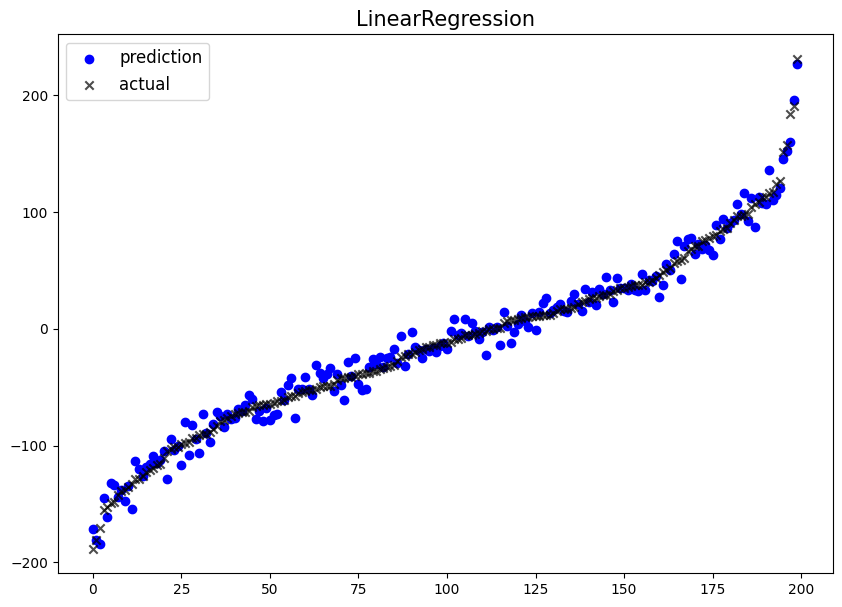

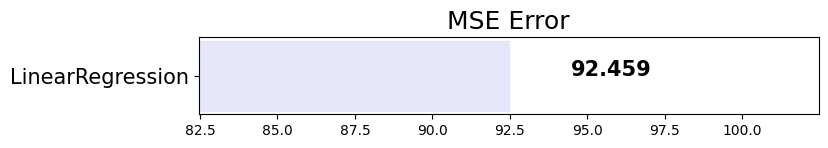



MSE and R-Squared
                        mse  R-Squared
LinearRegression  92.459379   0.983678


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 선형 회귀 모델 초기화
model = LinearRegression(n_jobs = -1)

# 모델 학습
model.fit(X_train, y_train)

# 예측
pred = model.predict(X_test)

# 평가
model_eval('LinearRegression',pred,y_test) # 모델, pred, actual